<a href="https://colab.research.google.com/github/xiaowei-v/replication-material-topic-trend-consumer/blob/main/Keyword_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wos_filtered.csv', index_col=0)

In [ ]:
df

,Authors,Author Full Names,Article Title,Source Title,Document Type,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",Publication Date,Publication Year,DOI,DOI Link,Author Keywords,Keywords Plus,Abstract
0,"Soni, N; Dawra, J","Soni, Nitin; Dawra, Jagrook",Judgments of acquisition value and transaction...,JOURNAL OF INDIAN BUSINESS RESEARCH,Article,NaN,66,3,4,NaN,2020,10.1108/JIBR-06-2018-0170,0.0,Consumer decision-making styles; Acquisition v...,PURCHASE DECISIONS; SALES PROMOTION; BRAND LOY...,Purpose An open question of behavioral pricing...
1,"Zong, Y; Guo, XJ","Zong, Yi; Guo, Xiaojie",An Experimental Study on Anchoring Effect of C...,FRONTIERS IN PSYCHOLOGY,Article,NaN,68,4,4,FEB 8,2022,10.3389/fpsyg.2022.794135,0.0,consumer experience; decision-making bias; anc...,SOCIAL MEDIA; DECISION; NUMBERS; NEED,Consumers are prone to cognitive biases in dec...
2,"Simonson, H; Bettman, JR; Kramer, T; Payne, JW","Simonson, Hamar; Bettman, James R.; Kramer, Th...",Directions for judgment and decision making re...,JOURNAL OF CONSUMER PSYCHOLOGY,Article,NaN,7,0,0,JAN,2013,10.1016/j.jcps.2012.10.006,0.0,Decision Making; Preferences; Choice and Judgm...,PREFERENCE REVERSALS,Our target article proposed an alternative per...
3,"Dietvorst, BJ; Bartels, DM","Dietvorst, Berkeley J.; Bartels, Daniel M.",Consumers Object to Algorithms Making Morally ...,JOURNAL OF CONSUMER PSYCHOLOGY,Article,NaN,55,11,13,JUL,2022,10.1002/jcpy.1266,0.0,Morality; Judgment; Decision-making; Values; C...,PROCEDURAL JUSTICE; PEOPLE; JUDGMENT; SUPPORT;...,Why do consumers embrace some algorithms and f...
4,"Fennis, BM; Stroebe, W","Fennis, Bob M.; Stroebe, Wolfgang",Softening the Blow: Company Self-Disclosure of...,JOURNAL OF BUSINESS ETHICS,Article,NaN,47,45,57,MAR,2014,10.1007/s10551-013-1647-9,0.0,Consumer behavior; Social influence processes;...,STEALING THUNDER; PRODUCT FAILURE; MODERATING ...,Is self-disclosure of negative information a v...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,"Hazlett, RL; Hazlett, SY","Hazlett, RL; Hazlett, SY",Emotional response to television commercials: ...,JOURNAL OF ADVERTISING RESEARCH,Article,NaN,73,114,154,MAR-APR,1999,NaN,NaN,NaN,RESEARCH VALIDITY PROJECT; CONSUMER DECISION-M...,As television commercials increasingly contain...
1110,"Wagner, U; Ebster, C; Eberhardsteiner, L; Pren...","Wagner, Udo; Ebster, Claus; Eberhardsteiner, L...",The After-Effects of Fear-Inducing Public Serv...,DYNAMIC PERSPECTIVES ON MANAGERIAL DECISION MA...,Article; Book Chapter,NaN,65,0,0,NaN,2016,10.1007/978-3-319-39120-5_22,0.0,NaN,TELEVISION ADVERTISEMENTS; AUTOMATIC ACTIVATIO...,Messages using fear appeals often appear in so...
1111,"Cadario, R; Chandon, P","Cadario, Romain; Chandon, Pierre",Which Healthy Eating Nudges Work Best? A Meta-...,MARKETING SCIENCE,Article,NaN,179,192,207,MAY-JUN,2020,10.1287/mksc.2018.1128,0.0,meta-analysis; health; food; field experiment;...,TRAFFIC-LIGHT LABELS; CHOICE ARCHITECTURE; FOO...,We examine the effectiveness in field settings...
1112,"Song, YP; Phang, CW; Yang, S; Luo, XM","Song, Yiping (Amy); Phang, Chee Wei (David); Y...",The Effectiveness of Contextual Competitive Ta...,INTERNATIONAL JOURNAL OF ELECTRONIC COMMERCE,Article,NaN,95,8,8,NaN,2018,10.1080/10864415.2018.1462952,0.0,Competitor targeting; contextual targeting; Go...,ORGANIZATIONAL CITIZENSHIP BEHAVIOR; FIELD QUA...,Advancements in Internet technologies have ena...


In [ ]:
df['k1'] = df['Author Keywords'].str.lower().str.split(";")
df['k2'] = df['Keywords Plus'].str.lower().str.split(';')

In [ ]:
df['k1'] = df['k1'].apply(lambda x: [] if type(x) == float else x)
df['k2'] = df['k2'].apply(lambda x: [] if type(x) == float else x)

In [ ]:
df['k'] = (df.k1 + df.k2).map(set).map(list)

In [ ]:
df['k']

0       [ behavior,  sales promotion,  satisfaction,  ...
1       [ need,  experience marketing,  numbers,  anch...
2       [decision making,  preferences,  comparisons, ...
3       [procedural justice,  support,  values,  peopl...
4       [ trust, consumer behavior,  integrity,  trust...
                              ...                        
1109    [research validity project,  attitudes,  consu...
1110    [ responses,  appeals,  commercials,  judgment...
1111    [ health,  smarter lunchrooms,  choice archite...
1112    [ strategic advertising,  contextual targeting...
1113    [ machine-learning,  field experiment,  hetero...
Name: k, Length: 1114, dtype: object

In [ ]:
df[df['Publication Year'] == 1990]['k']

91    []
Name: k, dtype: object

In [ ]:
lst_year = list(range(1990, 2024))
all_keyw = []

for year in lst_year:
  if len(df[df['Publication Year'] == year]['k']) == 0 | len(df[df['Publication Year'] == year]['k']) == 1:
    lst_keyw = []
  else:
    lst_keyw = df[df['Publication Year'] == year]['k'].explode().to_list()
  all_keyw.append(lst_keyw)

df_key = pd.DataFrame(
    {'Publication Year': lst_year,
     'k': all_keyw
    })

In [ ]:
df_key

,Publication Year,k
0,1990,[]
1,1991,[]
2,1992,"[judgment, features, information, choice, j..."
3,1993,"[ attitude, accuracy, service quality, halo,..."
4,1994,"[judgment and decision making processes, ther..."
5,1995,"[ judgments, time, external search, diffusio..."
6,1996,"[ choice, displays, organizations, model, in..."
7,1997,"[choice, preference, attitudes, social cogn..."
8,1998,"[ online, feelings, impression, positive af..."
9,1999,"[ models, advertising, confidence, decision..."


In [ ]:
df_key['num_k'] = df['k'].apply(len)

<Axes: xlabel='Publication Year'>

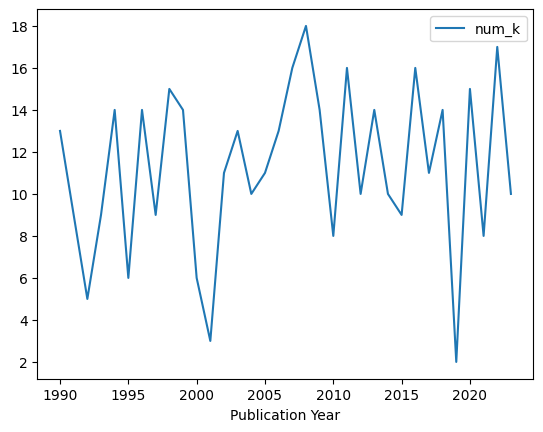

In [ ]:
df_key[['Publication Year', 'num_k']].plot.line(x = 'Publication Year', y = 'num_k')

In [ ]:
df_key_5 = df_key.groupby(df_key['Publication Year'] // 5).agg({'k' : 'sum', 'num_k': 'sum'})
df_key_5

,k,num_k
Publication Year,,
398,"[judgment, features, information, choice, j...",50
399,"[ judgments, time, external search, diffusio...",58
400,"[ cognitive effort, model, electronic market...",43
401,"[ behavior, consumer research, decision-makin...",72
402,"[ communication, illness management, patient...",58
403,"[ pride, sadness, construal-level, model, i...",52
404,"[ behavior, sales promotion, satisfaction, ...",50


<Axes: xlabel='Publication Year'>

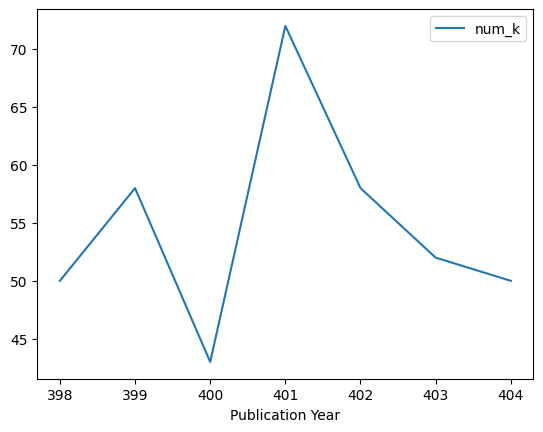

In [ ]:
df_key.groupby(df_key['Publication Year'] // 5).agg({'k' : 'sum', 'num_k': 'sum'}).plot.line()

In [ ]:
def count_key(lst_k):
  lst_k_clean = [keyw.strip() for keyw in lst_k if type(keyw) != float]
  pd.Series(lst_k_clean).value_counts()

In [ ]:
pd.Series(df_key_5['k'][398]).value_counts().head(16)

 judgment                   4
 decision-making            4
 judgments                  3
 model                      3
 information                3
 memory                     3
 knowledge                  3
 behavior                   3
 recall                     2
 models                     2
 choice                     2
 risk                       2
 validity                   2
service quality             2
judgment                    2
consumer decision-making    2
dtype: int64

In [ ]:
pd.Series(df_key_5['k'][399]).value_counts().head(16)

 judgment           13
 information        11
 judgments           9
 behavior            9
 choice              9
decision-making      7
 memory              7
 uncertainty         6
 context             5
 model               5
 contrast            5
 knowledge           5
 attitudes           4
 strategies          4
 impression          4
 decision-making     4
dtype: int64

In [ ]:
pd.Series(df_key_5['k'][400]).value_counts().head(16)

 information        20
 judgment           18
 judgments          18
 behavior           17
 model              12
 decision-making    12
decision-making     10
 choice             10
 persuasion          7
 memory              7
 need                6
 perception          5
 decision making     5
 context             5
 alternatives        5
 knowledge           5
dtype: int64

In [ ]:
pd.Series(df_key_5['k'][401]).value_counts().head(16)

 judgments          35
 judgment           31
 decision-making    29
 information        27
 choice             22
 behavior           20
decision-making     18
 model              16
 perceptions        15
 consumer choice    12
 decision making    10
 attitudes           8
 risk                8
 determinants        8
 mood                8
 impact              8
dtype: int64

In [ ]:
pd.Series(df_key_5['k'][402]).value_counts().head(40)

 judgment           45
 information        45
 decision-making    43
 judgments          41
 behavior           37
 choice             36
 decision making    28
 model              26
 preferences        16
 preference         16
 heuristics         15
 perception         15
decision-making     15
 impact             15
 perceptions        15
 consumers          13
 quality            13
 consumer choice    12
 risk               12
 uncertainty        12
 perspective        11
 knowledge          11
 consumption        11
 persuasion         11
 mood               10
 determinants       10
 memory             10
 decision            9
 consumer            9
 self                9
 selection           9
 context             9
 performance         8
 beliefs             8
 time                8
 attitudes           8
 feelings            7
 search              7
 emotions            7
 health              7
dtype: int64

In [ ]:
pd.Series(df_key_5['k'][403]).value_counts().head(25)

 judgment           71
 decision-making    49
 choice             48
 behavior           46
 judgments          44
 information        41
 model              37
decision-making     32
 perceptions        27
 impact             26
 preferences        25
 decision making    21
 risk               20
 consumers          20
 quality            17
 preference         17
 consumption        17
 decision           17
 attitudes          15
 knowledge          14
 perception         14
 uncertainty        13
 satisfaction       12
 loss aversion      12
 beliefs            12
dtype: int64

In [ ]:
pd.Series(df_key_5['k'][404]).value_counts().head(30)

 judgment                        58
 decision-making                 45
 information                     43
 judgments                       38
 behavior                        37
 model                           36
 impact                          32
 consumers                       31
 perceptions                     28
 choice                          28
 consumption                     27
decision-making                  22
 quality                         17
 decision making                 16
 perception                      15
 performance                     14
 decision                        13
 attitudes                       13
 psychology                      12
 trust                           12
 self                            12
 knowledge                       12
 consumer                        11
 need                            11
 product                         11
 decisions                       11
 price                           11
 judgment and decision makin

In [ ]:
STOP = ['decision-making', 'judgment', 'judgments', 'behavior', 'choice', 'model', 'perceptions', 'impact', 'consumers', 'consumer choice',
        'consumption', 'decision', 'decision making', 'perception', 'Decision making', 'consumer', 'models', 'consequences', 'perspective',
        'decisions', 'framework', 'design', 'alternatives', 'judgment and decision making', 'Decision-making', 'Consumer behavior', 'Judgment',
        'dimensions', 'consumer behavior', 'consumer perceptions', 'consumer-behavior', 'choices', 'contrast', 'unique features', 'people', 'affect',
        'issues', 'scale', 'Judgment and decision making', 'thinking', 'dynamics', 'construction', 'consumer decision making', 'too', 'information',
        'consumer decision-making']

In [ ]:
lst_all_k = df_key.agg({'k' : 'sum'}).to_list()[0]

In [ ]:
len(lst_all_k)

13057

In [ ]:
# get rid of stopword (high frequency)
lst_all_key = []
for key in lst_all_k:
  if type(key) != float:
    if key.strip() not in STOP:
      lst_all_key.append(key.strip())

In [ ]:
pd.Series(lst_all_key).value_counts()[0:50]

quality                    60
preferences                60
knowledge                  57
memory                     57
risk                       56
attitudes                  55
preference                 55
uncertainty                53
ethical decision-making    44
context                    43
self                       43
persuasion                 42
emotion                    39
performance                39
beliefs                    39
word-of-mouth              36
emotions                   36
mood                       35
determinants               35
consumer ethics            34
satisfaction               34
product                    34
psychology                 33
price                      33
trust                      32
attitude                   30
strategies                 30
responses                  29
cognition                  29
heuristics                 28
organizations              28
self-control               28
experience                 28
need      

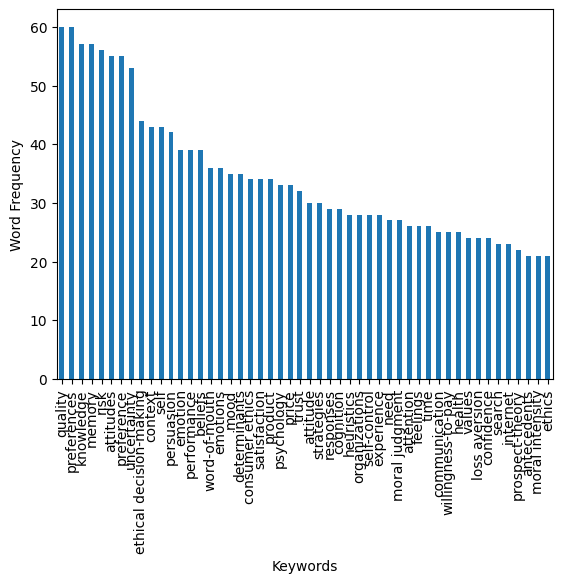

In [ ]:
pd.Series(lst_all_key).value_counts()[0:50].plot.bar()
plt.xlabel('Keywords')
plt.ylabel('Word Frequency')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurekw1.png')

In [ ]:
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 6000)
#pd.reset_option('^display.', silent=True)

In [ ]:
df_key

def remove_stop(lst_key, STOP = STOP):
  lst_key_keep = []
  for key in lst_key:
    if type(key) != float:
      if key.strip() not in STOP:
        lst_key_keep.append(key.strip())
  return lst_key_keep


df_key['k_informative'] = df_key['k'].apply(remove_stop)

In [ ]:
df_key

,Publication Year,k,num_k,k_informative
0,1990,[],13,[]
1,1991,[],9,[]
2,1992,"[judgment, features, information, choice, j...",5,"[features, memory, diffusion, information over..."
3,1993,"[ attitude, accuracy, service quality, halo,...",9,"[attitude, accuracy, service quality, halo, as..."
4,1994,"[judgment and decision making processes, ther...",14,"[judgment and decision making processes, thera..."
5,1995,"[ judgments, time, external search, diffusio...",6,"[time, external search, diffusion-models, pric..."
6,1996,"[ choice, displays, organizations, model, in...",14,"[displays, organizations, involvement, categor..."
7,1997,"[choice, preference, attitudes, social cogn...",9,"[preference, attitudes, social cognition, flex..."
8,1998,"[ online, feelings, impression, positive af...",15,"[online, feelings, impression, positive affect..."
9,1999,"[ models, advertising, confidence, decision...",14,"[advertising, confidence, strategies, hierarch..."


In [ ]:
df_key_5_update = df_key.groupby(df_key['Publication Year'] // 5).agg({'k_informative' : 'sum', 'num_k': 'sum'})
df_key_5_update

,k_informative,num_k
Publication Year,,
398,"[features, memory, diffusion, information over...",50
399,"[time, external search, diffusion-models, pric...",58
400,"[cognitive effort, electronic marketplaces, in...",43
401,"[consumer research, decision-making models, to...",72
402,"[communication, illness management, patients n...",58
403,"[pride, sadness, construal-level, incidental e...",52
404,"[sales promotion, satisfaction, discounts, acq...",50


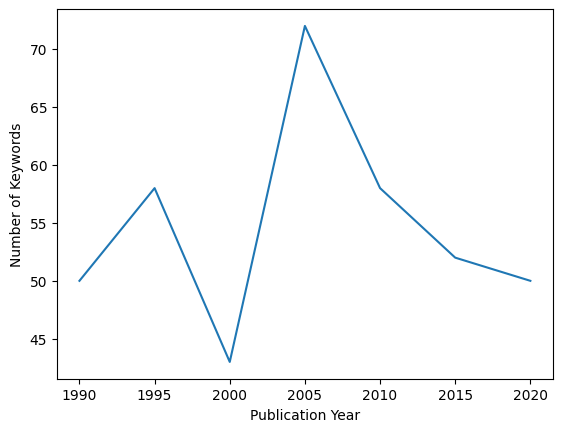

In [ ]:
df_key_5_update.plot.line(legend = None)
labels = ["1990", "1995", "2000", "2005", "2010", "2015", "2020"]
tickvalues = [398, 399, 400, 401, 402, 403, 404]
plt.xticks(tickvalues, labels)
plt.ylabel('Number of Keywords')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurekw2.png')

<Axes: >

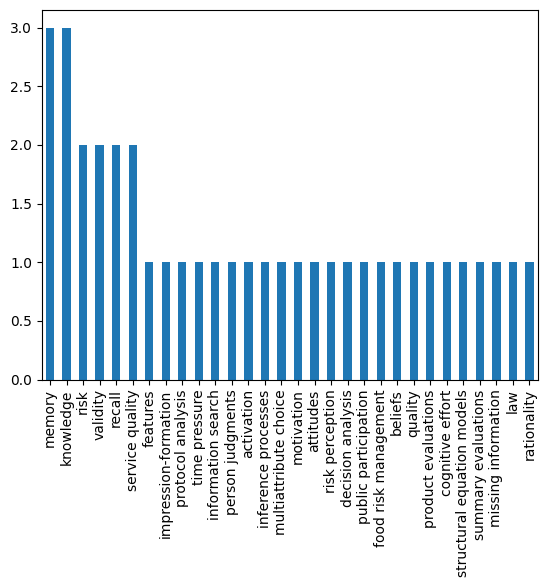

In [ ]:
pd.Series(df_key_5_update['k_informative'][398]).value_counts().head(30).plot.bar()

<Axes: >

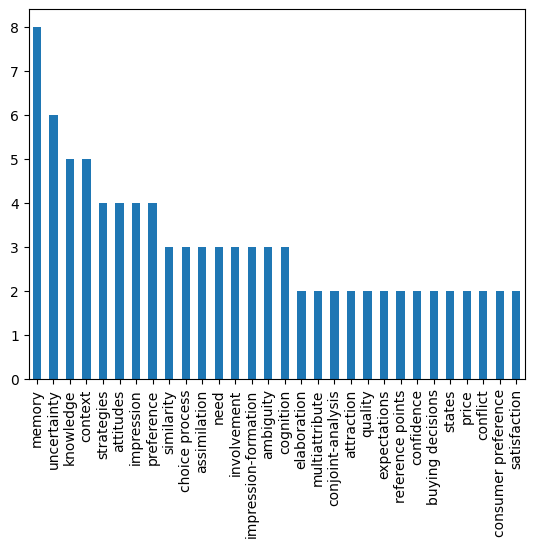

In [ ]:
pd.Series(df_key_5_update['k_informative'][399]).value_counts().head(30).plot.bar()

<Axes: >

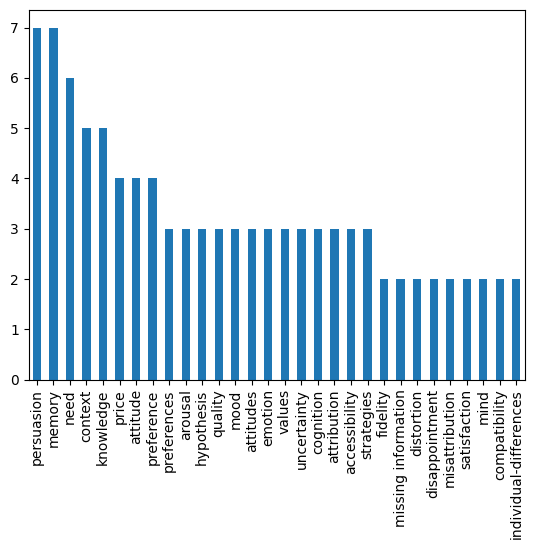

In [ ]:
pd.Series(df_key_5_update['k_informative'][400]).value_counts().head(30).plot.bar()

<Axes: >

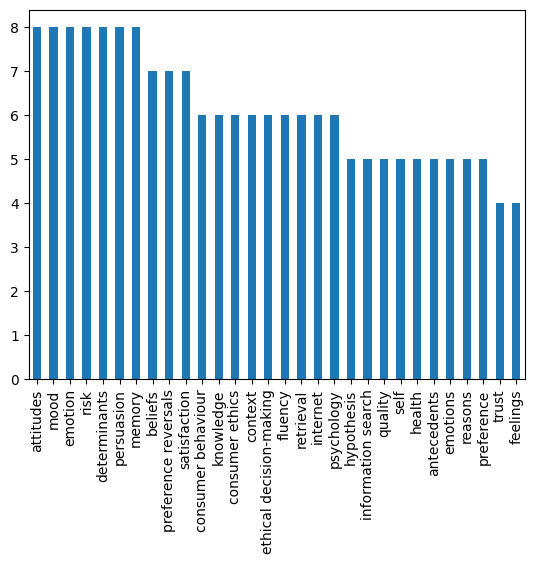

In [ ]:
pd.Series(df_key_5_update['k_informative'][401]).value_counts().head(30).plot.bar()

<Axes: >

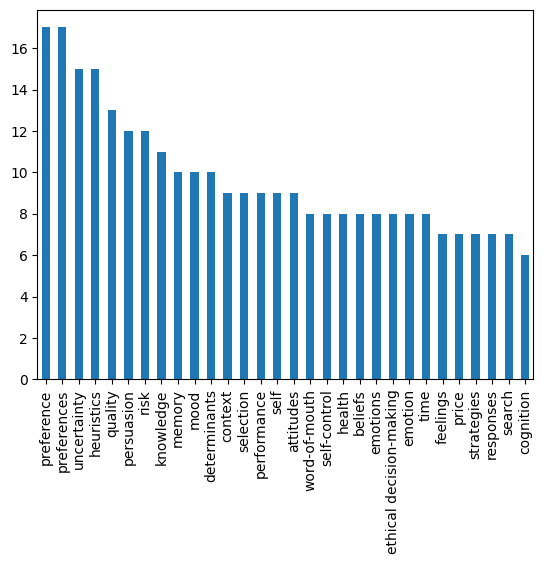

In [ ]:
pd.Series(df_key_5_update['k_informative'][402]).value_counts().head(30).plot.bar()

<Axes: >

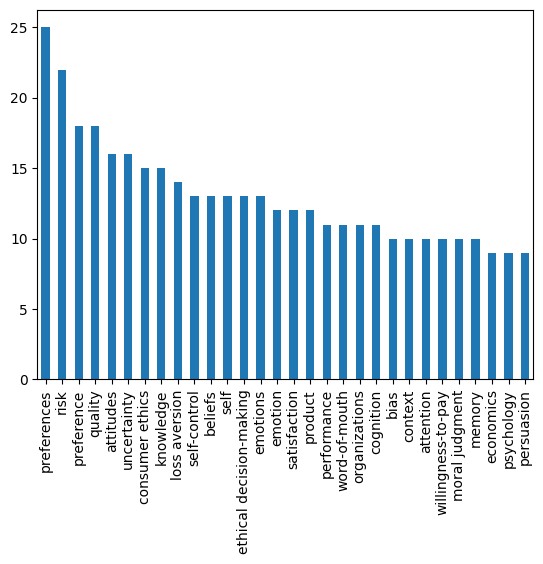

In [ ]:
pd.Series(df_key_5_update['k_informative'][403]).value_counts().head(30).plot.bar()

<Axes: >

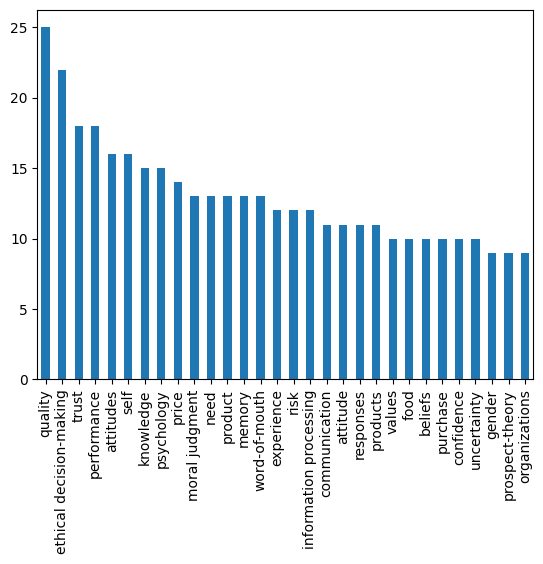

In [ ]:

pd.Series(df_key_5_update['k_informative'][404]).value_counts().head(30).plot.bar()

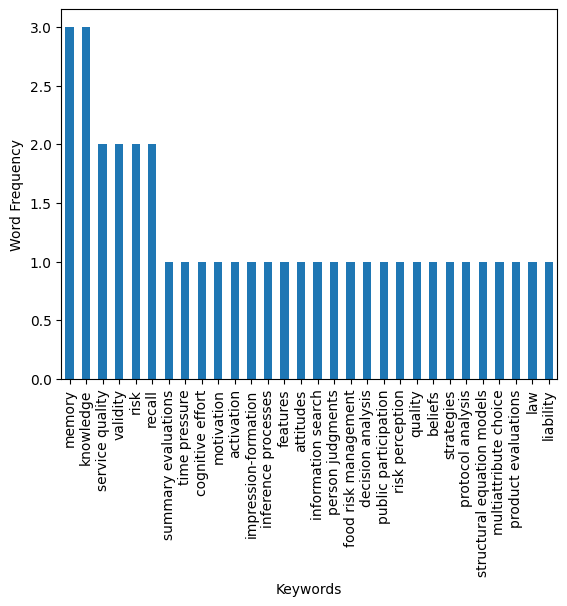

In [ ]:
pd.Series(df_key_5_update['k_informative'][398]).value_counts().head(30).plot.bar()
plt.xlabel('Keywords')
plt.ylabel('Word Frequency')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurekw3.png')

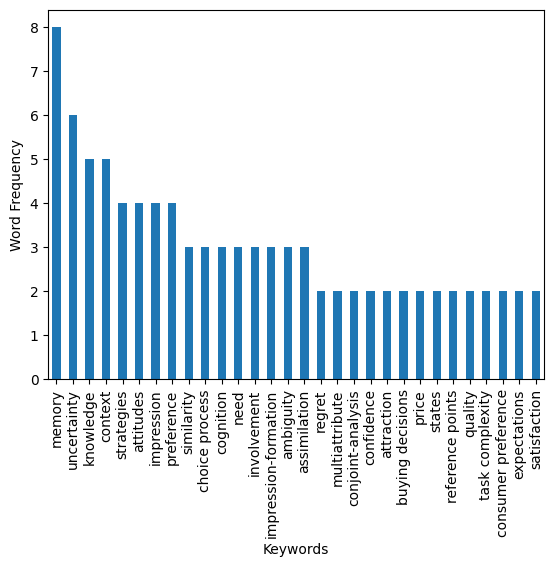

In [ ]:
pd.Series(df_key_5_update['k_informative'][399]).value_counts().head(30).plot.bar()
plt.xlabel('Keywords')
plt.ylabel('Word Frequency')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurekw4.png')

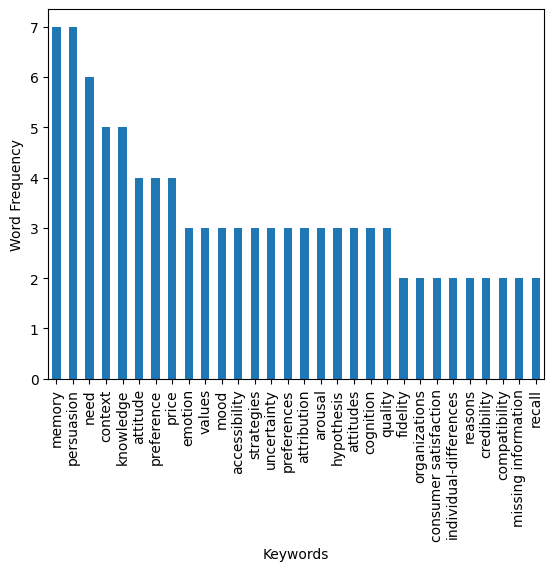

In [ ]:
pd.Series(df_key_5_update['k_informative'][400]).value_counts().head(30).plot.bar()
plt.xlabel('Keywords')
plt.ylabel('Word Frequency')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurekw5.png')

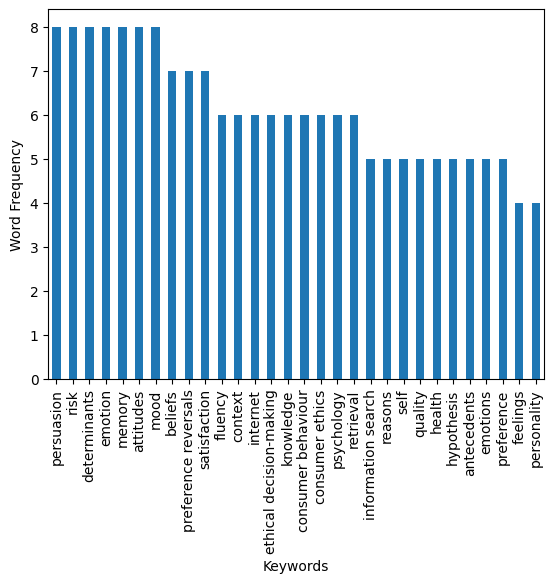

In [ ]:
pd.Series(df_key_5_update['k_informative'][401]).value_counts().head(30).plot.bar()
plt.xlabel('Keywords')
plt.ylabel('Word Frequency')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurekw6.png')

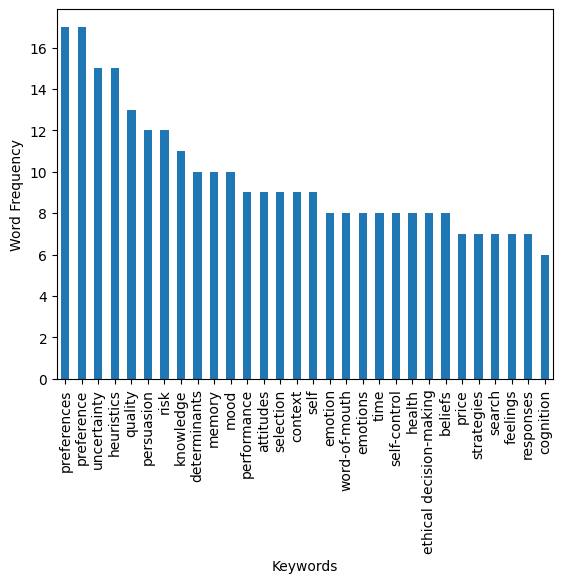

In [ ]:
pd.Series(df_key_5_update['k_informative'][402]).value_counts().head(30).plot.bar()
plt.xlabel('Keywords')
plt.ylabel('Word Frequency')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurekw7.png')

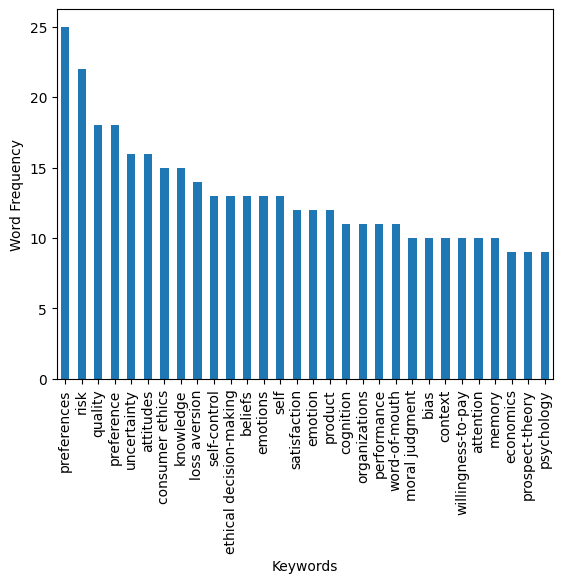

In [ ]:
pd.Series(df_key_5_update['k_informative'][403]).value_counts().head(30).plot.bar()
plt.xlabel('Keywords')
plt.ylabel('Word Frequency')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurekw8.png')

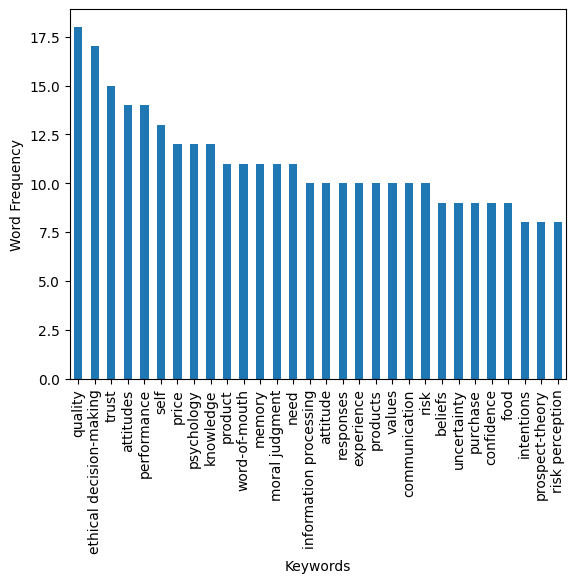

In [ ]:
pd.Series(df_key_5_update['k_informative'][404]).value_counts().head(30).plot.bar()
plt.xlabel('Keywords')
plt.ylabel('Word Frequency')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurekw9.png')